In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 

## Data generation 

In [5]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets =generated_targets)

## Solving with Tensorflow 

In [6]:
training_data = np.load('TF_intro.npz')

In [10]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)



Epoch 1/100

32/32 - 1s - loss: 29.9681 - 735ms/epoch - 23ms/step
Epoch 2/100
32/32 - 0s - loss: 4.5729 - 36ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 1.5050 - 36ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6536 - 31ms/epoch - 969us/step
Epoch 5/100
32/32 - 0s - loss: 0.4266 - 31ms/epoch - 969us/step
Epoch 6/100
32/32 - 0s - loss: 0.3613 - 29ms/epoch - 907us/step
Epoch 7/100
32/32 - 0s - loss: 0.3537 - 35ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3439 - 34ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3424 - 34ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3464 - 33ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3412 - 35ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3525 - 32ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3471 - 33ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3463 - 33ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3360 - 33ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3434 - 32ms/epoch 

## Extract the weights and bias 

In [11]:
model.layers[0].get_weights()

[array([[ 1.9737188],
        [-3.017972 ]], dtype=float32),
 array([5.004636], dtype=float32)]

## plotting the data 

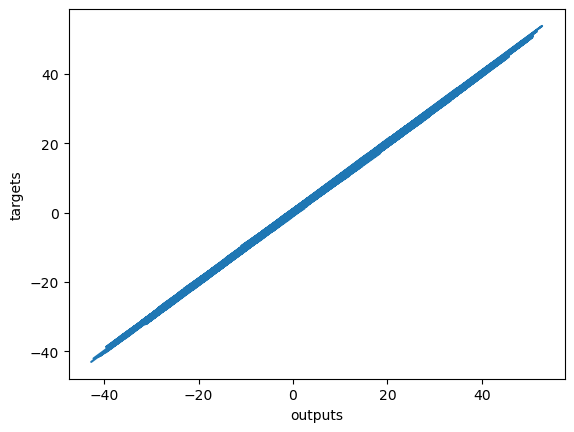

In [12]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()